# Fake News Identification Machine Learning Project
#### This is an intermediate-level data science machine learning Project to build a model that helps identify whether news is real or fake. At the end, there is also a graphical representation of PCA 

#### first import all the necessary modules

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


#### read the data set © ODSC

In [8]:
data_df = pd.read_csv("fake_and_real_news_dataset.csv")
data_df.head()

,idd,title,text,label
0,Fq+C96tcx+,‘A target on Roe v. Wade ’: Oklahoma bill maki...,UPDATE: Gov. Fallin vetoed the bill on Friday....,REAL
1,bHUqK!pgmv,Study: women had to drive 4 times farther afte...,Ever since Texas laws closed about half of the...,REAL
2,4Y4Ubf%aTi,"Trump, Clinton clash in dueling DC speeches","Donald Trump and Hillary Clinton, now at the s...",REAL
3,_CoY89SJ@K,Grand jury in Texas indicts activists behind P...,A Houston grand jury investigating criminal al...,REAL
4,+rJHoRQVLe,"As Reproductive Rights Hang In The Balance, De...",WASHINGTON -- Forty-three years after the Supr...,REAL


In [9]:
data_df.shape

(4594, 4)

In [21]:
label_counts = data_df['label'].value_counts()
print(label_counts)

label
REAL    2297
FAKE    2297
Name: count, dtype: int64


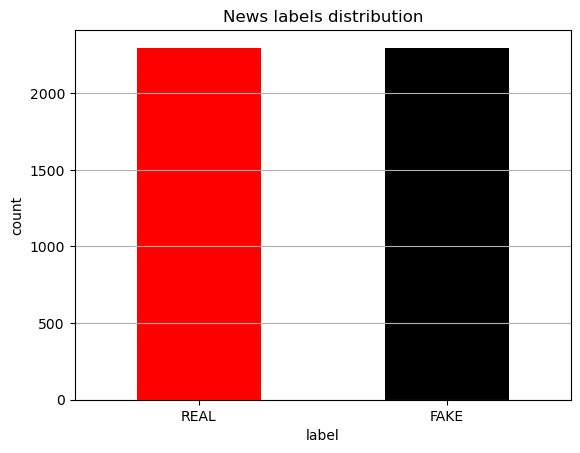

In [22]:
label_counts.plot(kind = 'bar', color=['red', 'black'])
plt.title('News labels distribution')
plt.xlabel('label')
plt.ylabel('count')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

#### separate the columns 

In [11]:
X = data_df["text"]
Y = data_df["label"]

In [12]:
data_labels = data_df.label
data_labels.head()

0    REAL
1    REAL
2    REAL
3    REAL
4    REAL
Name: label, dtype: object

#### split train and test data set 

In [13]:
x_train, x_test, y_train, y_test = train_test_split(data_df['text'],data_labels, test_size=0.2, random_state=7)

#### TF-IDF Vectorization *

In [14]:
tfidf_vectorizer = TfidfVectorizer(stop_words="english", max_df=0.7)

tfidf_train = tfidf_vectorizer.fit_transform(x_train)
tfidf_test = tfidf_vectorizer.transform(x_test)
X_tfidf = tfidf_vectorizer.fit_transform(X)

#### Initializing passive aggressive Classifier

In [15]:
pas_agg_clas = PassiveAggressiveClassifier(max_iter=60)
pas_agg_clas.fit(tfidf_train,y_train)


PassiveAggressiveClassifier(max_iter=60)

#### predict the data set and Calculate the accuracy score 

In [16]:
y_prediction = pas_agg_clas.predict(tfidf_test)
acc_score = accuracy_score(y_test, y_prediction)
print(f'Accuracy: {round(acc_score*100,2)}%')

Accuracy: 95.32%


#### confusion matrix to determine true positive and true negative as well as false positive and negative.

In [17]:
confusion_matrix(y_test, y_prediction, labels=['FAKE','REAL'])

array([[446,  20],
       [ 23, 430]])

#### Dimenstionality reduction with PCA

In [18]:
pca = PCA(n_components = 2)
X_reduced = pca.fit_transform(X_tfidf.toarray())


#### Data frame for ploting 

In [19]:
data_df_plot = pd.DataFrame()
data_df_plot['PCA1'] = X_reduced[:,0]
data_df_plot['PCA2'] = X_reduced[:,1]
data_df_plot['Label'] = Y.map({0:'FAKE', 1:'REAL'})


#### plot using seaborn

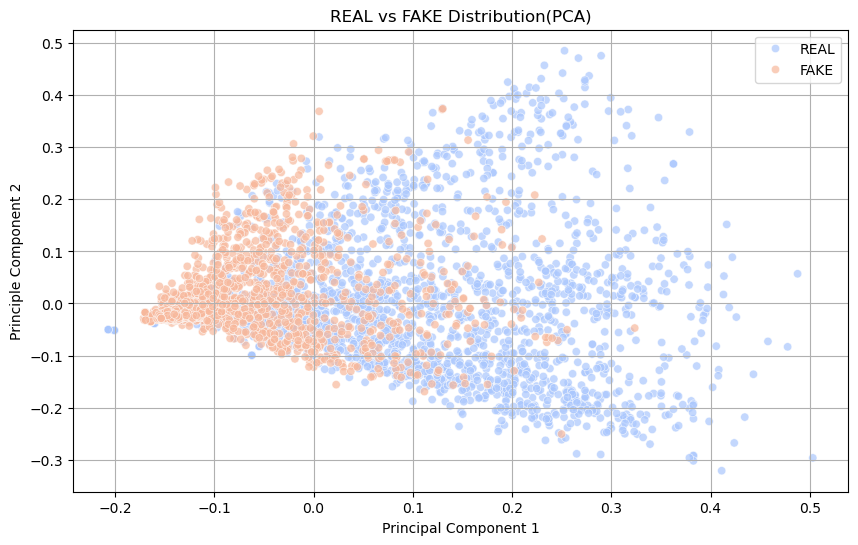

In [32]:

plt.figure(figsize=(10,6))
sns.scatterplot(data=data_df_plot,x='PCA1',y='PCA2',alpha = 0.7, hue= Y, palette= 'coolwarm')
plt.title('REAL vs FAKE Distribution(PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principle Component 2')
plt.legend()
plt.grid(True)
plt.show()

### Author: Solomon Mengesha Kebede 

####

####

#### * TF (Term Frequency): The number of times a word appears in a document is its Term Frequency. A higher value means a term appears more often than others, and so, the document is a good match when the term is part of the search terms.

#### IDF (Inverse Document Frequency): Words that occur many times a document, but also occur many times in many others, may be irrelevant. IDF is a measure of how significant a term is in the entire corpus.

#### The TfidfVectorizer converts a collection of raw documents into a matrix of TF-IDF features.



####  new feature axes created by PCA.
##### Principal Component 1 (PC1) is the direction with the most variance in your dataset — it captures the largest difference between your samples.
##### Principal Component 2 (PC2) is the direction orthogonal (perpendicular) to PC1, with the second most variance.